# Introduction

The study of hotel reservation booking status, specifically whether a reservation is cancelled or not, involves analyzing a dataset that captures various attributes and features associated with hotel bookings. This dataset can include information such as customer demographics, booking dates, room types, payment details, and the ultimate booking outcome (cancelled or not cancelled).

**Importing all required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots as ms
import plotly.graph_objects as go
colors = sns.color_palette("Blues")
import random
import scipy.stats as stats
import statsmodels.api as sma
import statsmodels.formula.api as sfa
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler,\
PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression,ElasticNet, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, RFE, f_oneway, chi2
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, mean_squared_error, f1_score, accuracy_score,\
classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from PIL import Image
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

pd.options.display.max_columns = None # display all columns of the dataframe

pd.options.display.max_rows = None # display all rows of the dataframe

pd.options.display.float_format = '{:.6f}'.format # to display the float values upto 6 decimal places

plt.rcParams['figure.figsize'] = [12,7]

print("DONE")

DONE


In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

**Loading the dataset**

In [9]:
hotel = pd.read_csv('hotel reservations.csv')
df_hotel = hotel.copy()
df_hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500000,0,Canceled


In [4]:
# checking the shape of the dataset

print(f'There are {df_hotel.shape[0]} rows and {df_hotel.shape[1]} columns')

There are 36275 rows and 19 columns


In [5]:
df_hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


avg_price seems incorrect information it contains 0 so replacing it with null

In [6]:
df_hotel.avg_price_per_room.replace(0,np.nan, inplace = True)

# Data Preprocessing - 1

In [7]:
#  The bookingID is a unique identifier and does not provide any meaningful information or contribute to building the model,
# it can be dropped from the dataset.

df_hotel.drop('Booking_ID', axis = 1, inplace = True)

# Exploratory Data Analysis

**UNIVARIATE, BIVARIATE AND MULTIVARIATE ANALYSIS**

**Univariate Analysis**

In [8]:
# numerical and categorical features

# numerical continuous
num_features = ['lead_time','avg_price_per_room']

# it also includes numerical discrete
cat_features = ['no_of_special_requests','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                'no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'type_of_meal_plan',
                'required_car_parking_space','room_type_reserved','arrival_year', 'arrival_month',
                'market_segment_type', 'repeated_guest', 'booking_status']

In [9]:
# Univariate analysis for numerical features

fig = ms(rows=1, cols=2, subplot_titles=num_features)

for i, feature in enumerate(num_features, 1):
    row = (i - 1) // 2 + 1
    column = (i - 1) % 2 + 1
    fig.add_trace(go.Histogram(x = df_hotel[feature], name=feature), row=row, col=column)
    fig.update_xaxes(title_text=f'skew:{round(df_hotel[feature].skew(),2)}', row=row, col=column)

fig.update_layout(height=400, width=900, title_text='HistPlots of Numerical Features', 
                  margin=dict(l=40, r=40, t=60, b=40),
                  showlegend=False)

fig.update_yaxes(title_text="Values")
fig.show()

##### Inferences
Lead time: The lead time feature has a positive skew, which means that the distribution of the data is skewed to the right. This means that there are more bookings with shorter lead times than there are bookings with longer lead times. This could be because people who book further in advance are more likely to be planning a trip and have a more flexible schedule.

Average price per room: The average price per room feature has a negative skew, which means that the distribution of the data is skewed to the left. This means that there are more bookings with lower average prices than there are bookings with higher average prices. This could be because people who are on a budget are more likely to book a cheaper hotel.

In [10]:
# Univariate analysis for numerical features

fig = ms(rows=1, cols=2, subplot_titles=num_features)

for i, feature in enumerate(num_features, 1):
    row = (i - 1) // 2 + 1
    column = (i - 1) % 2 + 1
    fig.add_trace(go.Box(y = df_hotel[feature], name = feature), row = row , col = column)
    fig.update_xaxes(title_text = 'There are Outliers', row = row, col = column)

fig.update_layout(height=400, width=900, title_text='Box Plots of Numerical Features', 
                  margin=dict(l=40, r=40, t=60, b=40),
                  showlegend=False)

fig.update_yaxes(title_text="Values")
fig.show()


In [11]:
len(cat_features)

15

In [12]:
# Univariate analysis for categorical features

fig = ms(rows=8, cols=2, subplot_titles=cat_features)

for i, feature in enumerate(cat_features, 1):
    row = (i - 1) // 2 + 1
    column = (i - 1) % 2 + 1
    fig.add_trace(go.Bar(x = df_hotel[feature].value_counts().index,
                         y = df_hotel[feature].value_counts().values,
                         text = round(df_hotel[feature].value_counts(normalize=True)*100,2).values),row = row,col = column)
    fig.update_xaxes(tickmode = 'array', tickvals = list(df_hotel[feature].value_counts().index), row = row, col = column)

fig.update_layout(height=1800, width=1000, title_text='Count and % of every class of Categorical Features', 
                  margin=dict(l=40, r=40, t=60, b=40),
                  showlegend=False)

fig.update_yaxes(title_text="Values")

fig.show()

##### Inferences
No. of adults: Most bookings have 2 adults.

No. of children: Most bookings have 0 children.

No. of weekend nights: Most bookings have 1 weekend night.

No. of week nights: Most bookings have 3 week nights.

Lead time: Most bookings are made 140 days in advance.

No. of previous cancellations: Most bookings have 0 previous cancellations.

No. of previous bookings not canceled: Most bookings have 2 previous bookings that were not canceled.

Avg. price per room: Most bookings have an average price of \$100 per room.

No. of special requests: Most bookings have 0 special requests.

No. of previous cancellations: Most bookings have 0 previous cancellations.

No. of previous bookings not canceled: Most bookings have 2 previous bookings that were not canceled.

Avg. price per room: Most bookings have an average price of \$100 per room.

No. of special requests: Most bookings have 0 special requests.

Market segment type: Most bookings are made through the online channel.

Repeated guest: Most bookings are not made by repeat guests.

Booking status: Most bookings are not canceled.

**Bivariate Analysis**

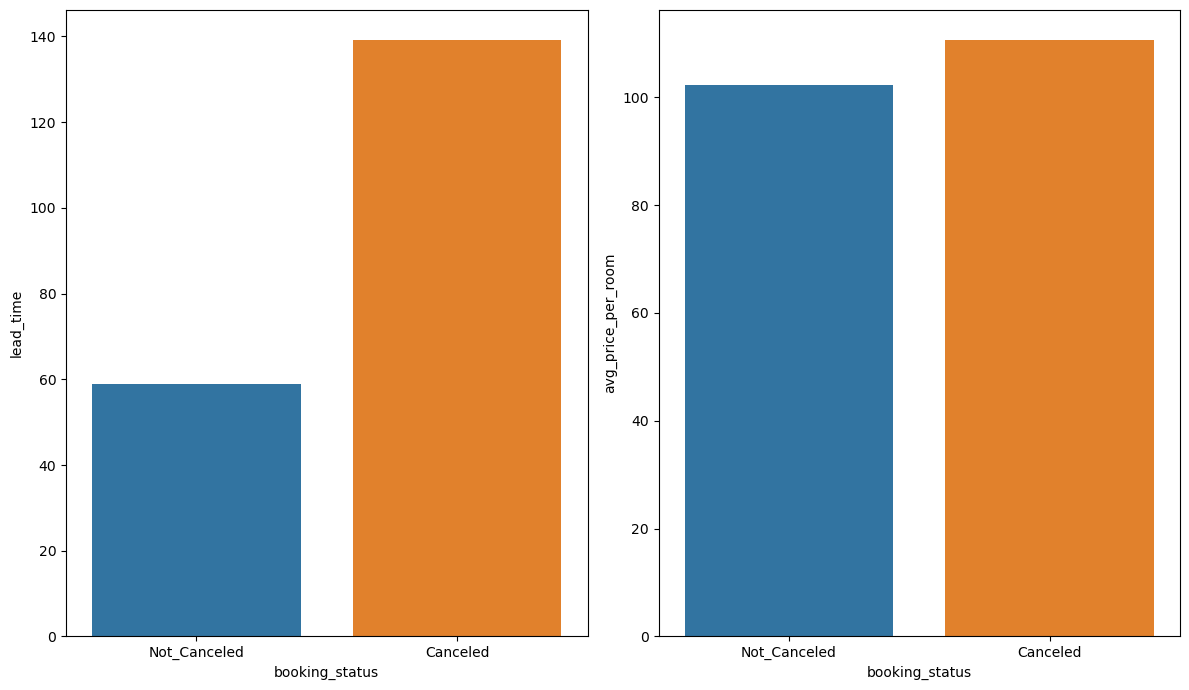

In [13]:
# Bivariate analysis with numerical features and booking status

fig, ax = plt.subplots(1, 2)

for i, v in zip(num_features, ax.flatten()):
    sns.barplot(x=df_hotel['booking_status'], y=df_hotel[i], ax=v, ci=None)

plt.tight_layout()
plt.show()

##### Inferences

Lead time: On average, the lead time (the number of days between the booking date and the check-in date) is 139.215482 days for bookings that are canceled and 58.927224 days for bookings that are not canceled.

Avg. price per room: On average, the average price per room is 110.589966 dollars for bookings that are canceled and \$99.931412 for bookings that are not canceled.

In [14]:
# Bivariate analysis for cateogorical features

for i in cat_features:
    print(i.upper(), pd.crosstab(df_hotel['booking_status'], df_hotel[i]), sep = '\n')
    print()

NO_OF_SPECIAL_REQUESTS
no_of_special_requests      0     1     2    3   4  5
booking_status                                       
Canceled                 8545  2703   637    0   0  0
Not_Canceled            11232  8670  3727  675  78  8

NO_OF_PREVIOUS_CANCELLATIONS
no_of_previous_cancellations     0    1   2   3   4   5   6   11  13
booking_status                                                      
Canceled                      11869   11   0   1   0   0   0   0   4
Not_Canceled                  24068  187  46  42  10  11   1  25   0

NO_OF_PREVIOUS_BOOKINGS_NOT_CANCELED
no_of_previous_bookings_not_canceled     0    1    2   3   4   5   6   7   8   \
booking_status                                                                  
Canceled                              11878    4    0   0   1   0   1   0   0   
Not_Canceled                          23585  224  112  80  64  60  35  24  23   

no_of_previous_bookings_not_canceled  9   10  11  12  13  14  15  16  17  18  \
booking_stat

##### Inferences

No. of special requests: There is a positive relationship between the number of special requests and the likelihood of a booking being canceled. This suggests that guests who make less special requests are more likely to cancel their bookings.

No. of previous cancellations: There is a positive relationship between the number of previous cancellations and the likelihood of a booking being canceled. This suggests that guests who have canceled bookings in the past are more likely to cancel future bookings.

No. of previous bookings not canceled: There is a negative relationship between the number of previous bookings not canceled and the likelihood of a booking being canceled. This suggests that guests who have not canceled bookings in the past are less likely to cancel future bookings.

Avg. price per room: There is a negative relationship between the average price per room and the likelihood of a booking being canceled. This suggests that guests are less likely to cancel bookings for more expensive rooms.

No. of adults: There is a positive relationship between the number of adults and the likelihood of a booking being canceled. This suggests that bookings with more adults are more likely to be canceled.

No. of children: There is a negative relationship between the number of children and the likelihood of a booking being canceled. This suggests that bookings with more children are less likely to be canceled.

No. of weekend nights: There is a positive relationship between the number of weekend nights and the likelihood of a booking being canceled. This suggests that bookings with more weekend nights are more likely to be canceled.

No. of week nights: There is a negative relationship between the number of week nights and the likelihood of a booking being canceled. This suggests that bookings with more week nights are less likely to be canceled.

Type of meal plan: There is no significant relationship between the type of meal plan and the likelihood of a booking being canceled.

Required car parking space: There is a positive relationship between the requirement for car parking space and the likelihood of a booking being canceled. This suggests that bookings that require car parking space are more likely to be canceled.

Room type reserved: There is no significant relationship between the room type reserved and the likelihood of a booking being canceled.

Arrival year: There is no significant relationship between the arrival year and the likelihood of a booking being canceled.

Arrival month: There is a positive relationship between the arrival month and the likelihood of a booking being canceled. This suggests that bookings in the summer months are more likely to be canceled.

Market segment type: There is a positive relationship between the market segment type and the likelihood of a booking being canceled. This suggests that bookings made through the offline channel are more likely to be canceled.

Repeated guest: There is a negative relationship between whether the guest is a repeated guest and the likelihood of a booking being canceled. This suggests that repeated guests are less likely to cancel their bookings.

**Multivariate Analysis**

In [15]:
num_features

['lead_time', 'avg_price_per_room']

In [16]:
cat_features

['no_of_special_requests',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'arrival_year',
 'arrival_month',
 'market_segment_type',
 'repeated_guest',
 'booking_status']

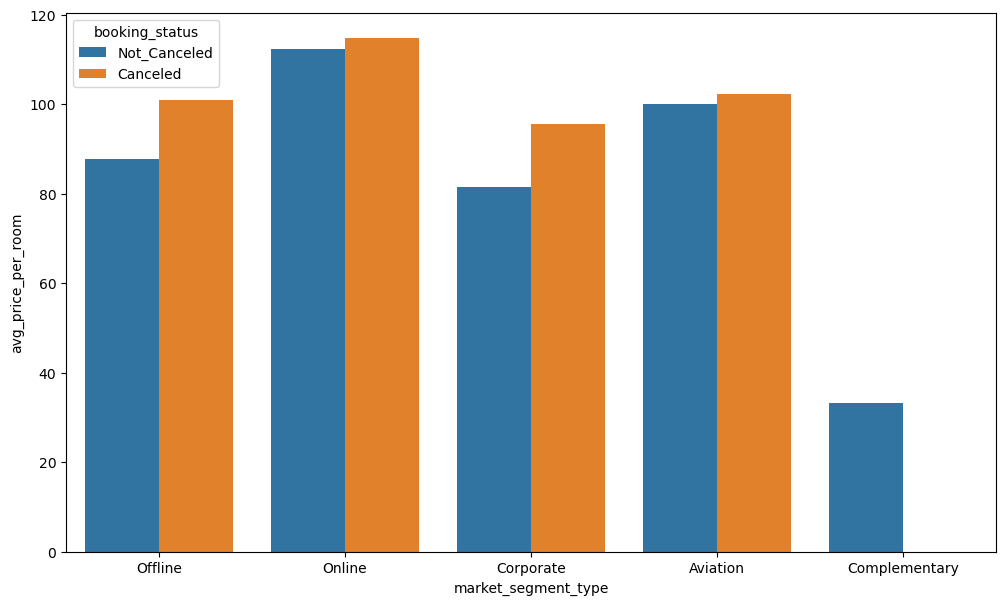

In [17]:
# from the above exploration we may see the market segment type,avg price and booking status 
# can have impact we will check for that

sns.barplot(data = df_hotel, x = 'market_segment_type', y = 'avg_price_per_room' , hue = 'booking_status', ci = None)
plt.show()

From the above plot we can see that bookings made through online is more likely to be cancelled.

# Data Preprocessing - 2

### Missing Values

In [18]:
# Checking for missing values

null_df = pd.DataFrame()
null_df['Count of null values'] = df_hotel.isnull().sum()
null_df['% of null values'] = round(df_hotel.isnull().sum()/len(df_hotel)*100,2)
null_df

,Count of null values,% of null values
no_of_adults,0,0.000000
no_of_children,0,0.000000
no_of_weekend_nights,0,0.000000
no_of_week_nights,0,0.000000
type_of_meal_plan,0,0.000000
required_car_parking_space,0,0.000000
room_type_reserved,0,0.000000
lead_time,0,0.000000
arrival_year,0,0.000000
arrival_month,0,0.000000


There are 545 null values in avg_price. It can be imputed by taking group by of room_type_reserved

In [19]:
room_median = df_hotel.groupby('room_type_reserved')['avg_price_per_room'].median()
null_index = df_hotel[df_hotel['avg_price_per_room'].isnull()].index.tolist()
df_hotel.loc[null_index, 'avg_price_per_room'] = df_hotel.loc[null_index, 'room_type_reserved'].map(room_median)

In [20]:
df_hotel.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Null values have been cleared.

### Feature Engineering

Combining year, month, and day into a single column enables a consolidated date representation, aiding data analysis and providing insights into temporal aspects. Additionally, by determining whether each date falls on a weekday or weekend, further understanding of patterns and trends in the dataset can be gained.

In [21]:
# Creating a date column
import datetime
df_hotel['Date'] = pd.to_datetime(df_hotel[['arrival_year', 'arrival_month',
                                            'arrival_date']].astype(str).agg('/'.join, axis=1), errors='coerce')

# Creating a day column

df_hotel['Day'] = df_hotel['Date'].apply(lambda x: 'Weekend' if datetime.datetime.weekday(x) >= 5 else 'Weekday')

In [22]:
# Dropping of individual date columns

df_hotel.drop(columns = ['arrival_year','arrival_month','arrival_date','Date'], inplace = True)

### Performing Significance test

Hypothesis :

H0 : There is no significant relationship between the dependent and independent variable

Ha : There is significant relationship between the dependent and independent variable

Significance level :

Considering significance level as 0.05

In [23]:
# numerical and categorical features

num_features = ['lead_time','avg_price_per_room','no_of_special_requests','no_of_previous_cancellations', 
                'no_of_previous_bookings_not_canceled','no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                'no_of_week_nights']


cat_features = [ 'type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type', 
                'repeated_guest', 'Day']

In [24]:
# Creating a dataframe to store the results of statistical tests

statistical_result = pd.DataFrame(columns = ['Variable Name' , 'Pvalue' , 'Remarks'])

# Categorical vs Categorical (booking_status) - chi2_contingency

for i in cat_features:
    stat , pval ,*a = stats.chi2_contingency(pd.crosstab(df_hotel[i],df_hotel['booking_status']))
    
    statistical_result = statistical_result.append({'Variable Name' : i , 'Pvalue' : pval ,
                                                    'Remarks' : 'Reject H0' if pval <= 0.05 else 'Failed to Reject H0'},
                                                   ignore_index = True)
    

# Numerical vs Categorical(booking_status) - f_oneway

for i in num_features:
    groups = [df_hotel.loc[df_hotel['booking_status'] == subclass , i] for subclass 
              in df_hotel['booking_status'].unique()]
    
    stat , pval = stats.f_oneway(*groups)
    
    statistical_result = statistical_result.append({'Variable Name': i , 'Pvalue': pval ,
                                                    'Remarks': 'Reject H0' if pval < 0.05 else 'Failed to reject H0'},
                                                   ignore_index = True)
    
statistical_result

,Variable Name,Pvalue,Remarks
0,type_of_meal_plan,0.000000,Reject H0
1,required_car_parking_space,0.000000,Reject H0
2,room_type_reserved,0.000000,Reject H0
3,market_segment_type,0.000000,Reject H0
4,repeated_guest,0.000000,Reject H0
5,Day,0.000000,Reject H0
6,lead_time,0.000000,Reject H0
7,avg_price_per_room,0.000000,Reject H0
8,no_of_special_requests,0.000000,Reject H0
9,no_of_previous_cancellations,0.000000,Reject H0


##### Inference

After performing statistical tests, all variables were found to be statistically significant. This suggests that each variable examined in the study has a meaningful relationship with the outcome. These findings indicate the importance of all variables in influencing the booking_status variable.

### Encoding

In [25]:
df_hotel.select_dtypes(include = 'object').columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status', 'Day'],
      dtype='object')

**Type_of_meal_plan**

In [26]:
df_hotel.groupby('type_of_meal_plan')['avg_price_per_room'].median().sort_values()

type_of_meal_plan
Not Selected    90.000000
Meal Plan 1     99.670000
Meal Plan 2    109.000000
Meal Plan 3    205.380000
Name: avg_price_per_room, dtype: float64

Type of meal plan variable is an ordinal categorical variable. It has a hierarchy between the subclasses. Meal plan type affects the price of room. Each plan has different prices.

In [27]:
oe = OrdinalEncoder(categories = [['Not Selected','Meal Plan 1','Meal Plan 2', 'Meal Plan 3']])

df_hotel['type_of_meal_plan'] = oe.fit_transform(df_hotel[['type_of_meal_plan']])

df_hotel['type_of_meal_plan'] = df_hotel['type_of_meal_plan'].astype(int)

df_hotel['type_of_meal_plan'].unique()

array([1, 0, 2, 3])

**Room_type_reserved**

In [28]:
df_hotel.groupby('room_type_reserved')['avg_price_per_room'].median()

room_type_reserved
Room_Type 1    94.500000
Room_Type 2    86.250000
Room_Type 3   110.000000
Room_Type 4   127.875000
Room_Type 5   123.730000
Room_Type 6   183.150000
Room_Type 7   205.380000
Name: avg_price_per_room, dtype: float64

Type of room type reserved variable is an ordinal categorical variable. It has a hierarchy between the subclasses. Meal plan type affects the price of room. Each plan has different prices.

In [29]:
oe = OrdinalEncoder(categories = [['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
                                   'Room_Type 5', 'Room_Type 6', 'Room_Type 7']])

df_hotel['room_type_reserved'] = oe.fit_transform(df_hotel[['room_type_reserved']])

df_hotel['room_type_reserved'] = df_hotel['room_type_reserved'].astype(int)

df_hotel['room_type_reserved'].unique()

array([0, 3, 1, 5, 4, 6, 2])

**Market_segment_type**

In [30]:
df_hotel.groupby('market_segment_type')['avg_price_per_room'].median().sort_values()

market_segment_type
Corporate        79.000000
Offline          90.000000
Complementary    94.500000
Aviation         95.000000
Online          107.100000
Name: avg_price_per_room, dtype: float64

Market segment type variable is an ordinal categorical variable. It has a hierarchy between the subclasses. For example when a corporate company does bulk booking there maybe slight discount in price of the room and for the customer who books through online has to pay more due to internet service charges , platform charges etc. Same can be applied also for other subclasses also

In [31]:
oe = OrdinalEncoder(categories = [['Corporate', 'Offline', 'Complementary', 'Aviation',
                                   'Online']])

df_hotel['market_segment_type'] = oe.fit_transform(df_hotel[['market_segment_type']])

df_hotel['market_segment_type'] = df_hotel['market_segment_type'].astype(int)

df_hotel['market_segment_type'].unique()

array([1, 4, 0, 3, 2])

#### Booking_status

In [32]:
df_hotel['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [33]:
df_hotel['booking_status'].replace({'Not_Canceled':0,'Canceled':1}, inplace = True)

df_hotel['booking_status'].unique()

array([0, 1], dtype=int64)

**Day**

For Day variable we can weight of evidence encoding technqiue

In [34]:
from category_encoders import WOEEncoder

In [35]:
df_hotel['Day'].unique()

day_woe = WOEEncoder()

df_hotel['Day'] = day_woe.fit_transform(df_hotel['Day'], df_hotel['booking_status'])

df_hotel['Day'].unique()

array([-0.04359294,  0.09116303])

### Treatment of Skewness

In [36]:
skewedfeat = df_hotel[num_features].skew()[(df_hotel[num_features].skew() > 0.5 ) | (
    df_hotel[num_features].skew() < -0.5 )].index.tolist()

In [37]:
skewedfeat

['lead_time',
 'avg_price_per_room',
 'no_of_special_requests',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights']

In [38]:
pt = PowerTransformer()

df_hotel[skewedfeat] = pt.fit_transform(df_hotel[skewedfeat])

### Splitting the dataset randomly into train and test dataset using ratio of 70:30 

In [39]:
X = df_hotel.drop('booking_status', axis = 1)
y = df_hotel.booking_status

xtrain , xtest , ytrain , ytest = train_test_split(X, y, test_size = 0.30, random_state = 7, stratify = y)

print('xtrain shape',xtrain.shape,'xtest shape',xtest.shape,'ytrain shape',
      ytrain.shape,'ytest shape',ytest.shape, sep = '\n')

xtrain shape
(25392, 15)
xtest shape
(10883, 15)
ytrain shape
(25392,)
ytest shape
(10883,)


**Building Base Model**

In [40]:
model_lr = sma.GLM(ytrain,sma.add_constant(xtrain)).fit()

pred_prob_train = model_lr.predict(sma.add_constant(xtrain))
pred_prob_test = model_lr.predict(sma.add_constant(xtest))


# Calculating youden's index to convert probability prediction to class prediction
# For train data

fpr , tpr , threshold = roc_curve(ytrain,pred_prob_train)

youden_index_train = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_train.append(res)

yi_train = max(np.round(youden_index_train,2))


# For test data

fpr , tpr , threshold = roc_curve(ytest,pred_prob_test)

youden_index_test = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_test.append(res)

yi_test = max(np.round(youden_index_test,2))

print(f'Youdens index for train data is {yi_train}')
print(f'Youdens index for test data is {yi_test}')

Youdens index for train data is 0.56
Youdens index for test data is 0.55


In [41]:
# Converting probability prediction to class prediction using 0.59 as threshold value

pred_train = [ 1 if i > 0.59 else 0  for i in pred_prob_train]
pred_test = [ 1 if i > 0.59 else 0  for i in pred_prob_test]

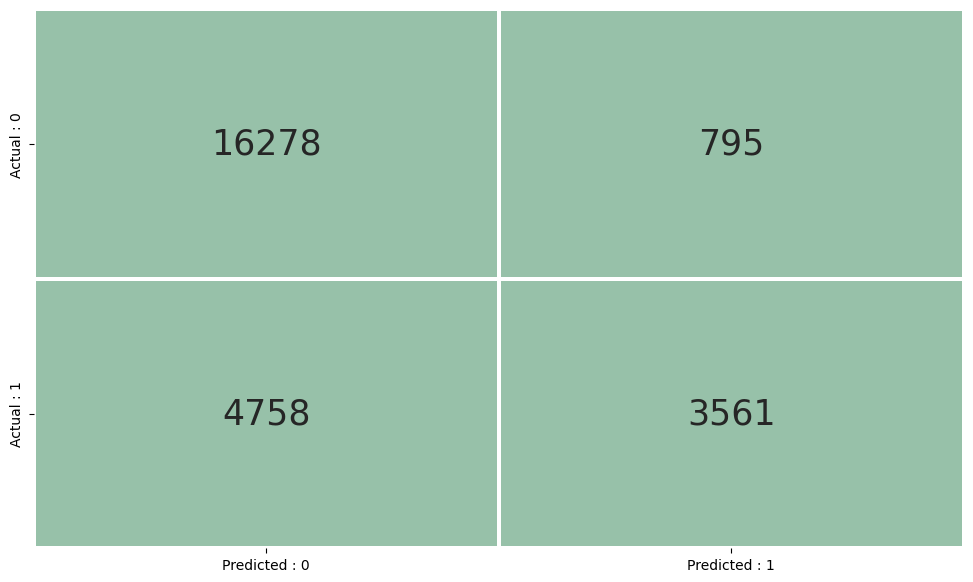

In [42]:
# plotting confusion matrix for train data

cm = confusion_matrix(ytrain,pred_train)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})
plt.show()

<AxesSubplot:>

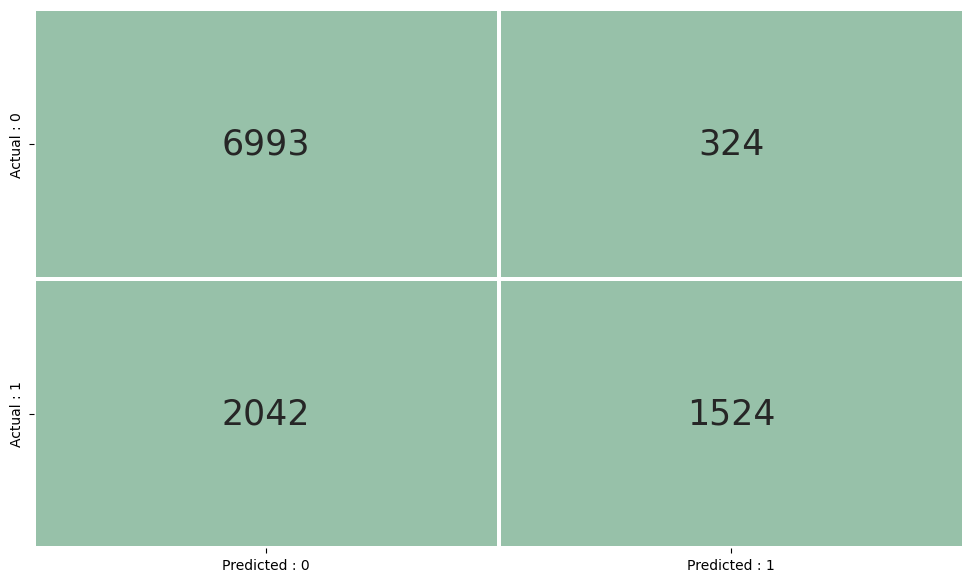

In [43]:
# plotting confusion matrix for test data

cm = confusion_matrix(ytest,pred_test)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})

In [44]:
print('Train Report',classification_report(ytrain,pred_train),
      'Test Report', classification_report(ytest,pred_test), sep = '\n')

Train Report
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     17073
           1       0.82      0.43      0.56      8319

    accuracy                           0.78     25392
   macro avg       0.80      0.69      0.71     25392
weighted avg       0.79      0.78      0.76     25392

Test Report
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      7317
           1       0.82      0.43      0.56      3566

    accuracy                           0.78     10883
   macro avg       0.80      0.69      0.71     10883
weighted avg       0.79      0.78      0.76     10883



### Building different models and evaluating using appropriate technique

In [64]:
# Creating a user defined function to store values of accuracy , precision , recall , f1 score

performance_df = pd.DataFrame(columns = ['Model Name','Train Accuracy','Train Precision','Train Recall','Train f1_score',
                                         'Test Accuracy','Test Precision','Test Recall','Test f1_score','AUC Score',
                                         'Remarks'])

def model_performance(model,name,xtrain = xtrain,xtest = xtest):
    global performance_df
    
    # Predicting train and test data
   
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    pred_prob_test = model.predict_proba(xtest)
    
    # Calculating metrics for train and test data
    
    train_acc = round(accuracy_score(ytrain,pred_train),2)*100
    test_acc = round(accuracy_score(ytest,pred_test),2)*100
    
    train_precision = round(precision_score(ytrain,pred_train),2)
    test_precision = round(precision_score(ytest,pred_test),2)
    
    train_recall = round(recall_score(ytrain,pred_train),2)
    test_recall = round(recall_score(ytest,pred_test),2)
    
    train_f1 = round(f1_score(ytrain,pred_train),2)
    test_f1 = round(f1_score(ytest,pred_test),2)
    
    # Defining a function for remarks
    
    def remarks(train,test):
        if abs(train - test) > 5 or train > 95:
            return 'Over Fit'
        elif train > 78 and test > 78:
            return 'Good Fit'
        else :
            return 'Under Fit'
        
    # Adding train and test scores in performance_df dataframe
    
    performance_df = performance_df.append({'Model Name': name, 'Train Accuracy':train_acc, 
                                            'Train Precision': train_precision,
                                            'Train Recall': train_recall, 'Train f1_score':train_f1,
                                            'Test Accuracy':test_acc,'Test Precision':test_precision,
                                            'Test Recall':test_recall, 'Test f1_score': test_f1,
                                            'AUC Score': round(roc_auc_score(ytest,pred_test),4),
                                            'Remarks': remarks(train_acc,test_acc)}, ignore_index = True)
    
    # Plotting roc curve
    
    fpr , tpr , threshold = roc_curve(ytest,pred_prob_test[:,1])
    plt.figure(figsize = (5,4))
    plt.plot(fpr,tpr)
    plt.plot([0,1],'r--')
    plt.text(x = 0.1 , y = 1 , s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))
    
    print('Train Report',classification_report(ytrain,pred_train),
      'Test Report', classification_report(ytest,pred_test), sep = '\n')

In [65]:
# Creating a user defined function to highlight the rows which are good fit

def highlight_row(df):
    color_green = ['background-color : #97C1A9']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

In [66]:
# Appending scores of base model to performance_df

performance_df = performance_df.append({'Model Name': 'Base Model - Logistic Regression',
                                       'Train Accuracy' : round(accuracy_score(ytrain,pred_train),2)*100,
                                       'Train Precision': round(precision_score(ytrain,pred_train),2),
                                       'Train Recall' : round(recall_score(ytrain,pred_train),2),
                                       'Train f1_score' : round(f1_score(ytrain,pred_train),2),
                                       'Test Accuracy': round(accuracy_score(ytest,pred_test),2)*100,
                                       'Test Precision' : round(precision_score(ytest,pred_test),2),
                                       'Test Recall': round(recall_score(ytest,pred_test),2),
                                       'Test f1_score': round(f1_score(ytest,pred_test),2),
                                        'AUC Score': round(roc_auc_score(ytest,pred_test),4),
                                       'Remarks': 'Base Model'}, ignore_index = True)

In [67]:
performance_df

,Model Name,Train Accuracy,Train Precision,Train Recall,Train f1_score,Test Accuracy,Test Precision,Test Recall,Test f1_score,AUC Score,Remarks
0,Base Model - Logistic Regression,83.000000,0.800000,0.630000,0.700000,82.000000,0.800000,0.620000,0.700000,0.771900,Base Model


Train Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17073
           1       1.00      0.98      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

Test Report
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7317
           1       0.78      0.78      0.78      3566

    accuracy                           0.86     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883



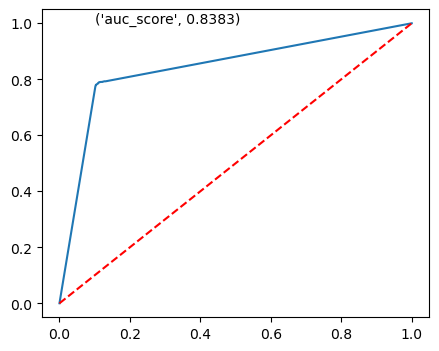

In [68]:
# Decision Tree Model without Hyperparameter tuning

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)

model_performance(model_dt,'DecisionTree without tuning')

Train Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17073
           1       0.99      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

Test Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7317
           1       0.85      0.78      0.82      3566

    accuracy                           0.89     10883
   macro avg       0.88      0.86      0.87     10883
weighted avg       0.88      0.89      0.88     10883



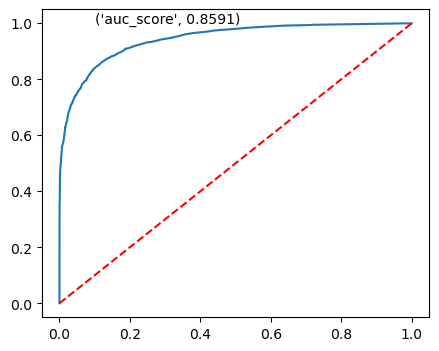

In [69]:
# RandomForest without tuning

model_rf = RandomForestClassifier().fit(xtrain,ytrain)

model_performance(model_rf, 'Random Forest without tuning')

Train Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     17073
           1       0.85      0.81      0.83      8319

    accuracy                           0.89     25392
   macro avg       0.88      0.87      0.88     25392
weighted avg       0.89      0.89      0.89     25392

Test Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7317
           1       0.79      0.75      0.77      3566

    accuracy                           0.85     10883
   macro avg       0.84      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



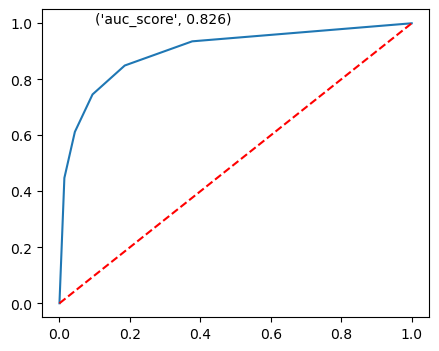

In [70]:
# KNN Model without tuning

model_knn = KNeighborsClassifier().fit(xtrain,ytrain)

model_performance(model_knn , 'KNN without tuning')

Train Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     17073
           1       0.74      0.65      0.69      8319

    accuracy                           0.81     25392
   macro avg       0.79      0.77      0.78     25392
weighted avg       0.81      0.81      0.81     25392

Test Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      7317
           1       0.75      0.66      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.80      0.78      0.78     10883
weighted avg       0.81      0.82      0.81     10883



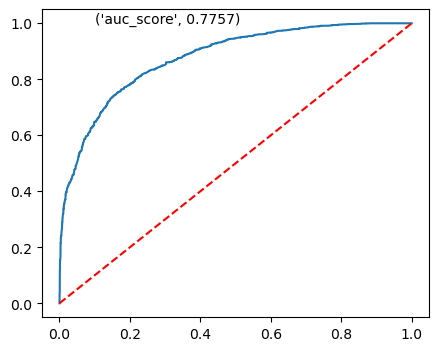

In [71]:
# AdaBoost classifier without tuning

model_ada = AdaBoostClassifier().fit(xtrain, ytrain)

model_performance(model_ada, 'AdaBoost without tuning')

Train Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.70      0.76      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.83     25392
weighted avg       0.85      0.85      0.85     25392

Test Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7317
           1       0.82      0.70      0.76      3566

    accuracy                           0.85     10883
   macro avg       0.84      0.81      0.83     10883
weighted avg       0.85      0.85      0.85     10883



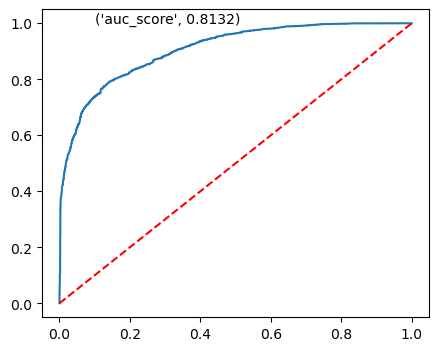

In [72]:
# Gradient Boosting without tuning

model_gb = GradientBoostingClassifier().fit(xtrain,ytrain)

model_performance(model_gb , 'Gradient Booosting')

Train Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17073
           1       0.89      0.81      0.85      8319

    accuracy                           0.90     25392
   macro avg       0.90      0.88      0.89     25392
weighted avg       0.90      0.90      0.90     25392

Test Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7317
           1       0.85      0.76      0.81      3566

    accuracy                           0.88     10883
   macro avg       0.87      0.85      0.86     10883
weighted avg       0.88      0.88      0.88     10883



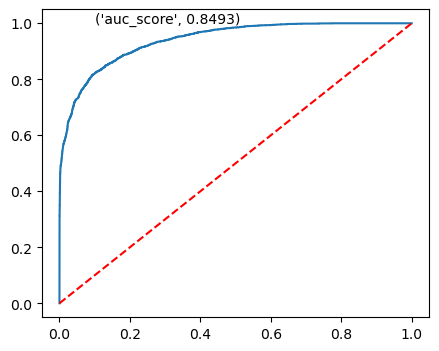

In [73]:
# XGBoost without tuning

model_xgb = XGBClassifier().fit(xtrain , ytrain)

model_performance(model_xgb , 'Xtreme Gradient Boosting without tuning')

Train Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17073
           1       0.80      0.75      0.77      8319

    accuracy                           0.86     25392
   macro avg       0.84      0.83      0.83     25392
weighted avg       0.85      0.86      0.85     25392

Test Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7317
           1       0.79      0.73      0.76      3566

    accuracy                           0.85     10883
   macro avg       0.83      0.82      0.82     10883
weighted avg       0.85      0.85      0.85     10883



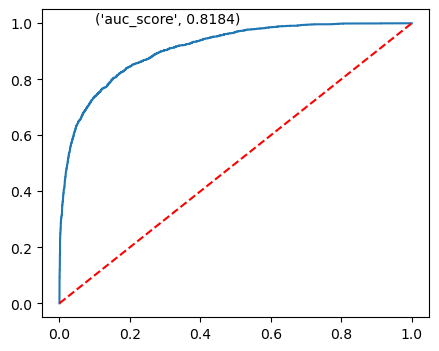

In [74]:
# Neural Network without tuning

model_nn = MLPClassifier().fit(xtrain,ytrain)

model_performance(model_nn , 'Neural Network')

In [81]:
performance_df.style.apply(highlight_row,axis=1)

,Model Name,Train Accuracy,Train Precision,Train Recall,Train f1_score,Test Accuracy,Test Precision,Test Recall,Test f1_score,AUC Score,Remarks
0,Base Model - Logistic Regression,83.000000,0.800000,0.630000,0.700000,82.000000,0.800000,0.620000,0.700000,0.771900,Base Model
1,DecisionTree without tuning,99.000000,1.000000,0.980000,0.990000,86.000000,0.780000,0.780000,0.780000,0.838300,Over Fit
2,Random Forest without tuning,99.000000,0.990000,0.990000,0.990000,89.000000,0.850000,0.780000,0.820000,0.859100,Over Fit
3,KNN without tuning,89.000000,0.850000,0.810000,0.830000,85.000000,0.790000,0.750000,0.770000,0.826000,Good Fit
4,AdaBoost without tuning,81.000000,0.740000,0.650000,0.690000,82.000000,0.750000,0.660000,0.700000,0.775700,Good Fit
5,Gradient Booosting,85.000000,0.820000,0.700000,0.760000,85.000000,0.820000,0.700000,0.760000,0.813200,Good Fit
6,Xtreme Gradient Boosting without tuning,90.000000,0.890000,0.810000,0.850000,88.000000,0.850000,0.760000,0.810000,0.849300,Good Fit
7,Neural Network,86.000000,0.800000,0.750000,0.770000,85.000000,0.790000,0.730000,0.760000,0.818400,Good Fit
8,SVM without tuning,83.000000,0.800000,0.630000,0.700000,82.000000,0.800000,0.620000,0.700000,0.771900,Base Model


Based on the performance_df, models such as KNN and XGBoost outperformed other models. To enhance their performance further, we can now focus on fine-tuning their hyperparameters. By refining the hyperparameters, we aim to optimize these models and potentially achieve even better results. This approach allows us to explore the potential for improved accuracy and efficiency, building upon the initial success of these high-performing models.

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}
Train Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17073
           1       1.00      0.98      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

Test Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7317
           1       0.82      0.77      0.80      3566

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



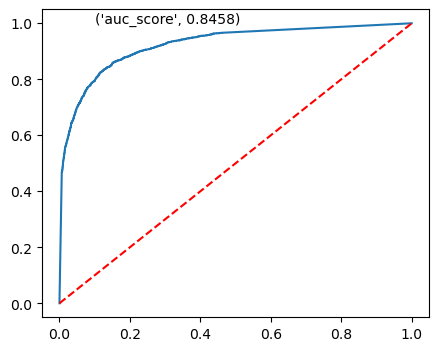

In [82]:
# KNN with hyperparameter tuning

params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric' : ['Manhattan','Euclidean', 'minkowski']
}

kfold = KFold(n_splits = 5)

grid_knn = GridSearchCV(KNeighborsClassifier() , param_grid = params , cv = 5).fit(xtrain , ytrain)

print(grid_knn.best_params_)

model_knn_tuned = grid_knn.best_estimator_.fit(xtrain , ytrain)

model_performance(model_knn_tuned , 'KNN With tuning')

Best parameters are : {'learning_rate': 1, 'n_estimators': 200}
Train Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     17073
           1       0.76      0.68      0.72      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.79      0.80     25392
weighted avg       0.82      0.83      0.82     25392

Test Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      7317
           1       0.77      0.68      0.72      3566

    accuracy                           0.83     10883
   macro avg       0.81      0.79      0.80     10883
weighted avg       0.83      0.83      0.83     10883



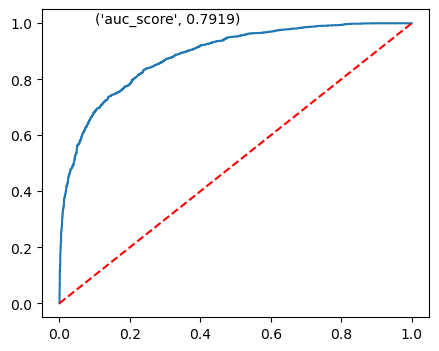

In [83]:
# AdaBoost with tuning

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ab = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_ab.best_params_)

model_ab_tuned = grid_ab.best_estimator_.fit(xtrain,ytrain)

model_performance(model_ab_tuned,name = 'AdaBoost with tuning')

In [85]:
# Gradient Boosting Model with Hyperparameter tuning

params = {
    'n_estimators': [10,20,30],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_gb = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = params ).fit(xtrain, ytrain)

print('Best parameters are :', grid_gb.best_params_ )

model_gb_tuned = grid_gb.best_estimator_.fit(xtrain, ytrain)

model_performance(model_gb_tuned, 'GradientBoosting with tuning')

NameError: name 'grid' is not defined

Best parameters are : {'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}
Train Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     17073
           1       0.86      0.75      0.80      8319

    accuracy                           0.88     25392
   macro avg       0.87      0.85      0.86     25392
weighted avg       0.88      0.88      0.87     25392

Test Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7317
           1       0.86      0.74      0.79      3566

    accuracy                           0.87     10883
   macro avg       0.87      0.84      0.85     10883
weighted avg       0.87      0.87      0.87     10883



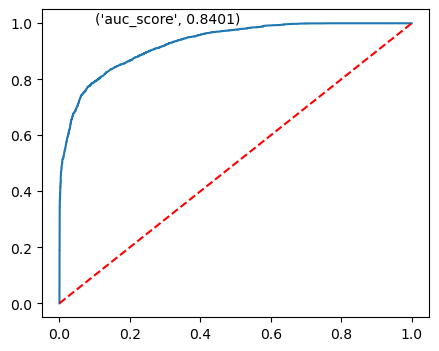

In [86]:
print('Best parameters are :', grid_gb.best_params_ )

model_gb_tuned = grid_gb.best_estimator_.fit(xtrain, ytrain)

model_performance(model_gb_tuned, 'GradientBoosting with tuning')

Best parameters are : {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 75}
Train Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     17073
           1       0.86      0.76      0.81      8319

    accuracy                           0.88     25392
   macro avg       0.88      0.85      0.86     25392
weighted avg       0.88      0.88      0.88     25392

Test Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7317
           1       0.85      0.75      0.80      3566

    accuracy                           0.87     10883
   macro avg       0.87      0.84      0.85     10883
weighted avg       0.87      0.87      0.87     10883



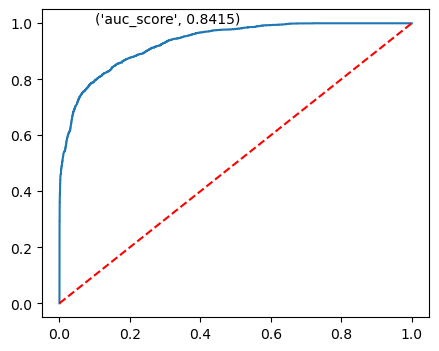

In [87]:
# XGB Classifier with tuning

params = {
    'n_estimators': [25,50,75],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5]
}

grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_xgb.best_params_)

model_xgb_tuned = grid_xgb.best_estimator_.fit(xtrain,ytrain)

model_performance(model_xgb_tuned,name = 'XGB with tuning')

In [88]:
performance_df.style.apply(highlight_row,axis=1)

,Model Name,Train Accuracy,Train Precision,Train Recall,Train f1_score,Test Accuracy,Test Precision,Test Recall,Test f1_score,AUC Score,Remarks
0,Base Model - Logistic Regression,83.000000,0.800000,0.630000,0.700000,82.000000,0.800000,0.620000,0.700000,0.771900,Base Model
1,DecisionTree without tuning,99.000000,1.000000,0.980000,0.990000,86.000000,0.780000,0.780000,0.780000,0.838300,Over Fit
2,Random Forest without tuning,99.000000,0.990000,0.990000,0.990000,89.000000,0.850000,0.780000,0.820000,0.859100,Over Fit
3,KNN without tuning,89.000000,0.850000,0.810000,0.830000,85.000000,0.790000,0.750000,0.770000,0.826000,Good Fit
4,AdaBoost without tuning,81.000000,0.740000,0.650000,0.690000,82.000000,0.750000,0.660000,0.700000,0.775700,Good Fit
5,Gradient Booosting,85.000000,0.820000,0.700000,0.760000,85.000000,0.820000,0.700000,0.760000,0.813200,Good Fit
6,Xtreme Gradient Boosting without tuning,90.000000,0.890000,0.810000,0.850000,88.000000,0.850000,0.760000,0.810000,0.849300,Good Fit
7,Neural Network,86.000000,0.800000,0.750000,0.770000,85.000000,0.790000,0.730000,0.760000,0.818400,Good Fit
8,SVM without tuning,83.000000,0.800000,0.630000,0.700000,82.000000,0.800000,0.620000,0.700000,0.771900,Base Model
9,KNN With tuning,99.000000,1.000000,0.980000,0.990000,87.000000,0.820000,0.770000,0.800000,0.845800,Over Fit


After assessing various models, it was observed that some models exhibited a significant drop in performance when applied to unseen data, indicating overfitting. However, there were models that consistently performed well on both training and unseen data. Notably, the XGB model outperformed other models in terms of performance. Hence, based on its superior performance and generalization ability, we can confidently consider the XGB model as our final choice.

**Pipeline**

In [10]:
df_hotel_dataset = hotel.copy()
df_hotel_dataset.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500000,0,Canceled


In [11]:
# Creating a date column
import datetime
df_hotel_dataset['Date'] = pd.to_datetime(df_hotel_dataset[['arrival_year', 'arrival_month',
                                            'arrival_date']].astype(str).agg('/'.join, axis=1), errors='coerce')

# Creating a day column

df_hotel_dataset['Day'] = df_hotel_dataset['Date'].apply(lambda x: 'Weekend' 
                                                         if datetime.datetime.weekday(x) >= 5 else 'Weekday')


df_hotel_dataset = df_hotel_dataset.drop(columns = ['Booking_ID','arrival_year','Date', 'arrival_month','arrival_date'])
df_hotel_dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Day
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.000000,0,Not_Canceled,Weekday
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.680000,1,Not_Canceled,Weekday
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.000000,0,Canceled,Weekday
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.000000,0,Canceled,Weekend
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.500000,0,Canceled,Weekday


In [12]:
df_hotel_dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Day
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.000000,0,Not_Canceled,Weekday
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.680000,1,Not_Canceled,Weekday
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.000000,0,Canceled,Weekday
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.000000,0,Canceled,Weekend
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.500000,0,Canceled,Weekday


In [13]:
df_hotel_dataset.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'Day'],
      dtype='object')

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import WOEEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer



X = df_hotel_dataset.drop('booking_status', axis = 1)
y = df_hotel_dataset.booking_status

y.replace({'Not_Canceled':0,'Canceled':1}, inplace = True)

num_cols = ['lead_time','avg_price_per_room','no_of_special_requests','no_of_previous_cancellations',
            'no_of_previous_bookings_not_canceled','no_of_children', 'no_of_weekend_nights','no_of_week_nights']

# encoding
oe_meal_plan = OrdinalEncoder(categories = [['Not Selected','Meal Plan 1','Meal Plan 2', 'Meal Plan 3']])
oe_room_type = OrdinalEncoder(categories = [['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
                                             'Room_Type 5', 'Room_Type 6', 'Room_Type 7']])
oe_market_segment = OrdinalEncoder(categories = [['Corporate', 'Offline', 'Complementary', 'Aviation','Online']])



preprocess = ColumnTransformer(transformers = [('Power',PowerTransformer(),num_cols),
                                               ('Encoding', oe_meal_plan, ['type_of_meal_plan']),
                                               ('Encoding1', oe_room_type, ['room_type_reserved']),
                                               ('Encoding2', oe_market_segment, ['market_segment_type']),
                                               ('woe', WOEEncoder(), ['Day'])
], remainder= 'passthrough'
)

# Initalising Pipeline
pipeline = Pipeline([('preprocessing',preprocess), ('modelXGB', XGBClassifier()) ])

# train test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 127)

pipeline.fit(xtrain, ytrain)

pred_test = pipeline.predict(xtest)

print(classification_report(ytest, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7259
           1       0.84      0.77      0.80      3624

    accuracy                           0.87     10883
   macro avg       0.87      0.85      0.86     10883
weighted avg       0.87      0.87      0.87     10883



In [15]:
import pickle

model = open('model_xgb.pickle', "wb")
pickle.dump(pipeline, model)
model.close()

In [16]:
xtrain.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'Day'],
      dtype='object')

In [17]:
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,25392.000000,1.841643,0.519792,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,25392.000000,0.104757,0.399940,0.000000,0.000000,0.000000,0.000000,9.000000
no_of_weekend_nights,25392.000000,0.811082,0.871726,0.000000,0.000000,1.000000,2.000000,6.000000
no_of_week_nights,25392.000000,2.208885,1.418997,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,25392.000000,0.030364,0.171590,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,25392.000000,84.272606,85.338811,0.000000,17.000000,56.000000,124.000000,443.000000
repeated_guest,25392.000000,0.025835,0.158646,0.000000,0.000000,0.000000,0.000000,1.000000
no_of_previous_cancellations,25392.000000,0.022290,0.346891,0.000000,0.000000,0.000000,0.000000,13.000000
no_of_previous_bookings_not_canceled,25392.000000,0.161823,1.854480,0.000000,0.000000,0.000000,0.000000,58.000000
avg_price_per_room,25392.000000,103.405455,35.259070,0.000000,80.200000,99.450000,120.000000,365.000000


In [23]:
%%writefile app.py

import numpy as np
import seaborn as sns
import streamlit as st
from IPython.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
import base64
from category_encoders import WOEEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder, PowerTransformer
import warnings
warnings.filterwarnings('ignore')
np.warnings.catch_warnings()

with open("HotelImage.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
st.markdown(
f"""
<style>
.stApp {{
    background-image: url(data:image/{"png"};base64,{encoded_string.decode()});
    background-size: cover
}}
</style>
""",
unsafe_allow_html=True
)

st.title("Hotel Booking Cancellation Prediction")
st.markdown("Will this customer honour the booking? ")

# step 1

model = open('model_xgb.pickle', "rb")
clf = pickle.load(model)
model.close()

# step 2
adults = st.number_input('No. of Adults',0,4,step = 1)
children = st.number_input('No. of children', 0,10,1)
wnd = st.slider('No. of weekend nights', 0,6)
wn = st.slider('No. of weekend nights', 0,17)
tmp = st.selectbox('Type of Meal Plan', ('Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected')) 
car_parking = st.number_input("Parking required or not", 0,1 , 1)
room_type = st.selectbox("Type of room type reserved ", ('Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
                       'Room_Type 5', 'Room_Type 6', 'Room_Type 7'))
lead_time = st.number_input("Lead Time" , 0,443,1)
segment_type = st.selectbox("Mode of Booking ", ('Online','Aviation','Offline','Corporate','Complementary'))
repeated_guest = st.selectbox("Repeat visit 0 --> NO , 1 --> Yes" , (0,1))
previous_cancellations = st.slider("No of previous cancellations", 0,13,1)
not_cancelled = st.slider("No of successful visits" , 0,58,1)
avg_price = st.slider("Price per room" , 0, 540, 10)
special_request = st.slider("Special requests if any" , 0,5,1)
day = st.selectbox('Weekday or Weekend',('Weekend','Weekday'))

# step3 : converting user input to model input

data = {'no_of_adults': adults,
        'no_of_children' : children, 
        'no_of_weekend_nights' : wnd, 
        'no_of_week_nights': wn,
        'type_of_meal_plan' : tmp,
       'required_car_parking_space': car_parking,
        'room_type_reserved': room_type,
        'lead_time': lead_time,
       "market_segment_type": segment_type,
       "repeated_guest": repeated_guest,
       "no_of_previous_cancellations" : previous_cancellations,
       "no_of_previous_bookings_not_canceled" : not_cancelled,
       "avg_price_per_room": avg_price,
       "no_of_special_requests" : special_request,
       "Day":day}

input_data = pd.DataFrame([data])

prediction = clf.predict(input_data)

if st.button("Check your Status"):
    if prediction == 0:
        st.subheader("Booking will be honoured")
    if prediction==1:
        st.subheader("Booking will be cancelled")

Overwriting app.py
